In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os




In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Data/Dataframelimpa_sem_latlong.csv")

In [3]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'

df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58536,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000
58537,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000
58538,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000
58539,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,04039000


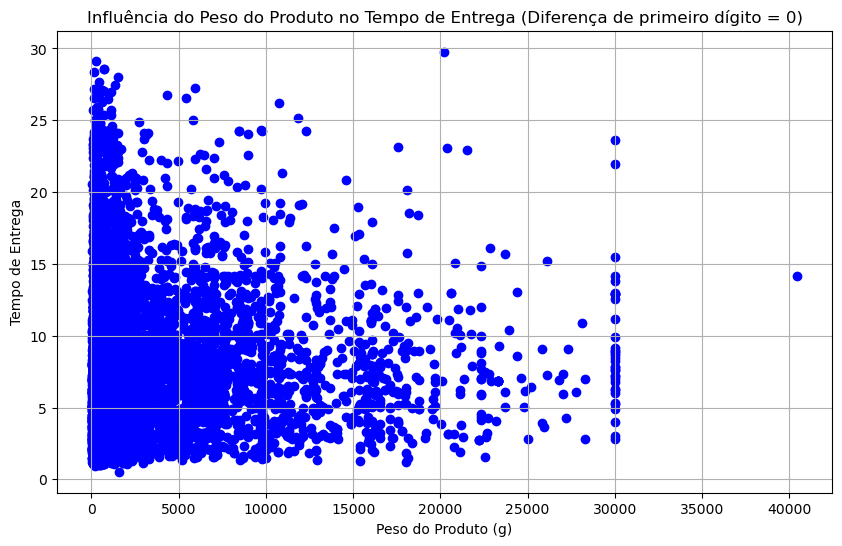

In [4]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero
df_filtered = df[df['seller_first_digit'] - df['customer_first_digit'] == 0]

# Plotando um gráfico para mostrar como o product_weight_g influencia no delivery_time
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_weight_g'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Peso do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0)')
plt.grid(True)
plt.show()

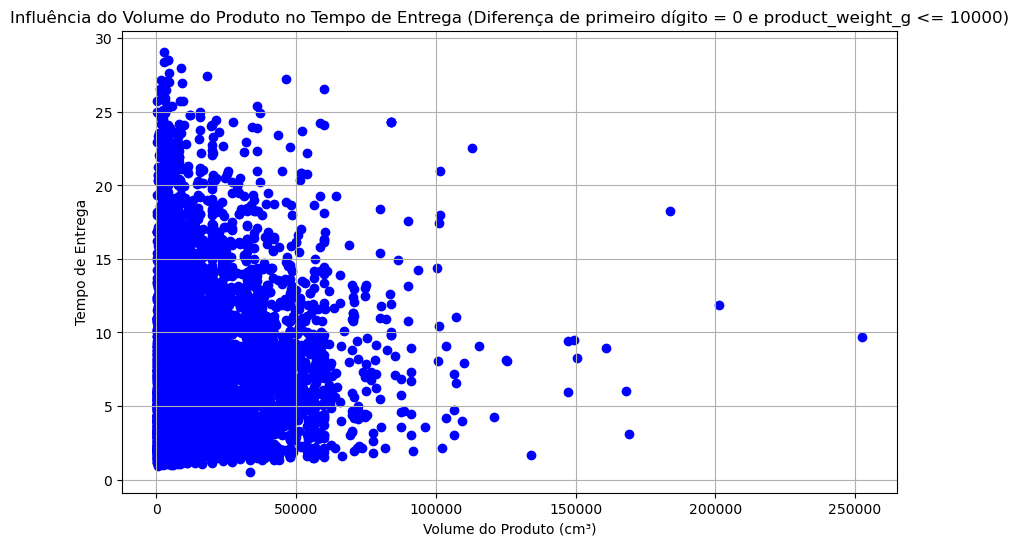

In [5]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Calculando o volume do produto em cm³
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero e o preço do produto é <= 1000
df_filtered = df[(df['seller_first_digit'] - df['customer_first_digit'] == 0) & (df['product_weight_g'] <= 10000)]

# Plotando um gráfico para mostrar como o volume do produto influencia no tempo de entrega
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_volume_cm3'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Volume do Produto (cm³)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Volume do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0 e product_weight_g <= 10000)')
plt.grid(True)
plt.show()

In [6]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,seller_first_digit,customer_first_digit,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000,2,2,3528.0
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000,3,3,14157.0
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000,1,3,2880.0
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000,0,1,2700.0
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000,0,1,5760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58536,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000,1,5,8000.0
58537,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000,0,0,9900.0
58538,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000,0,5,13500.0
58539,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,04039000,8,0,9576.0


Pedido em aprovação
Separando o pedido
Pedido em transporte
product_weight_g	
product_length_cm	
product_height_cm	
product_width_cm
payment_sequential (o que é isso?)
payment_installments(parcelas)
payment_value
product_volume_cm3


product_category_name
payment_type




target: delivery_time


In [7]:
""" colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"product_category_name",
"payment_type",
'delivery_time'] """

colunas=colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"payment_type",
'delivery_time']

df_analise=df[colunas]
df_analise


,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,payment_type,delivery_time
0,0.03,6.37,1.21,650.0,28.0,9.0,14.0,1,2,72.19,3528.0,credit_card,7.61
1,0.01,1.91,6.03,3050.0,33.0,13.0,33.0,1,5,216.87,14157.0,credit_card,7.95
2,1.26,0.30,5.11,450.0,24.0,8.0,15.0,1,1,34.59,2880.0,boleto,6.67
3,0.01,1.54,6.87,200.0,27.0,5.0,20.0,1,1,31.75,2700.0,credit_card,8.42
4,1.00,7.25,1.74,2000.0,30.0,12.0,16.0,1,3,157.60,5760.0,credit_card,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58536,0.01,4.29,16.61,175.0,20.0,20.0,20.0,1,4,456.28,8000.0,credit_card,20.91
58537,0.05,3.52,1.15,750.0,30.0,30.0,11.0,1,1,101.73,9900.0,credit_card,4.72
58538,0.04,2.06,18.98,2700.0,60.0,15.0,15.0,1,7,273.92,13500.0,credit_card,21.08
58539,1.00,1.92,1.88,967.0,21.0,24.0,19.0,1,3,116.85,9576.0,credit_card,4.80


In [8]:
df_dummies=pd.get_dummies(df_analise)
matriz=df_dummies.corr()
matriz

,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,delivery_time,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
Pedido em aprovação,1.000000,-0.002120,0.013552,0.018999,-0.003274,0.006409,-0.000319,-0.005599,-0.122612,0.055636,0.016493,0.073890,0.595969,-0.484410,0.004888,-0.025726
Separando o pedido,-0.002120,1.000000,0.013282,0.057508,0.048210,0.047809,0.058636,0.011750,0.014036,0.016508,0.065187,0.327242,-0.003665,0.000876,-0.001346,0.004251
Pedido em transporte,0.013552,0.013282,1.000000,0.024419,0.035266,0.003534,0.019155,-0.009249,0.053470,0.045004,0.010451,0.947181,-0.000055,0.003953,-0.008508,-0.002847
product_weight_g,0.018999,0.057508,0.024419,1.000000,0.432018,0.550864,0.501018,0.019776,0.187519,0.345340,0.777942,0.042280,-0.021591,0.022360,-0.018048,0.000637
product_length_cm,-0.003274,0.048210,0.035266,0.432018,1.000000,0.154276,0.545921,0.027725,0.121126,0.141939,0.530371,0.048199,-0.022994,0.013018,-0.008943,0.014293
product_height_cm,0.006409,0.047809,0.003534,0.550864,0.154276,1.000000,0.285551,0.013379,0.120931,0.236088,0.715771,0.018774,-0.019622,0.022932,-0.016583,-0.003716
product_width_cm,-0.000319,0.058636,0.019155,0.501018,0.545921,0.285551,1.000000,0.026533,0.154288,0.184110,0.637268,0.036483,-0.026585,0.020014,-0.013983,0.009796
payment_sequential,-0.005599,0.011750,-0.009249,0.019776,0.027725,0.013379,0.026533,1.000000,-0.100816,-0.083477,0.032494,-0.005360,-0.054929,-0.275337,-0.011073,0.542821
payment_installments,-0.122612,0.014036,0.053470,0.187519,0.121126,0.120931,0.154288,-0.100816,1.000000,0.356077,0.164056,0.047208,-0.280956,0.366034,-0.076730,-0.186089
payment_value,0.055636,0.016508,0.045004,0.345340,0.141939,0.236088,0.184110,-0.083477,0.356077,1.000000,0.299250,0.051034,-0.012557,0.086174,-0.022811,-0.116810


<Axes: >

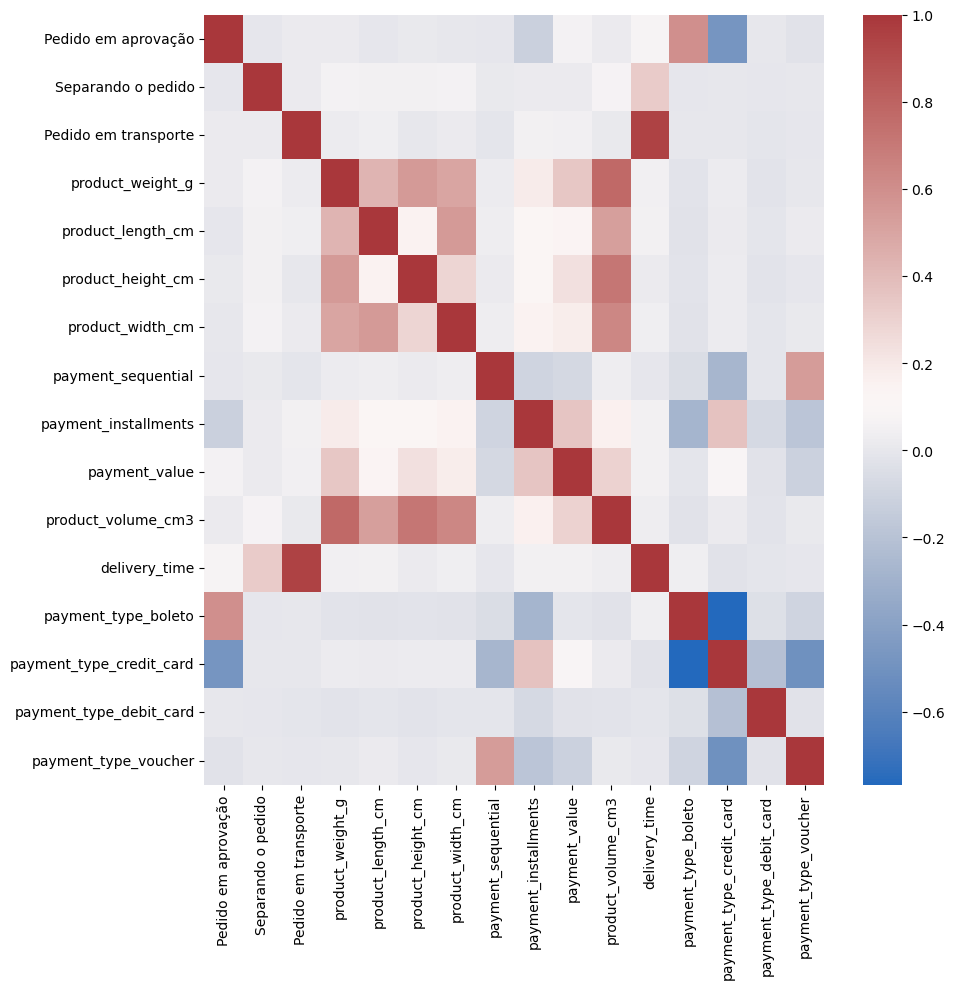

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=matriz,cmap="vlag")
